## Age Based on Image Regressor

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
from scipy.io import loadmat
from datetime import datetime

Dataset from https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/
@article{Rothe-IJCV-2016,
  author = {Rasmus Rothe and Radu Timofte and Luc Van Gool},
  title = {Deep expectation of real and apparent age from a single image without facial landmarks},
  journal = {International Journal of Computer Vision (IJCV)},
  year = {2016},
  month = {July},
}

Age extraction code based on https://github.com/yu4u/age-gender-estimation

In [4]:
path = Path('data/ages/wiki_crop')

In [5]:
def calc_age(taken, dob):
    birth = datetime.fromordinal(max(int(dob) - 366, 1))

    # assume the photo was taken in the middle of the year
    if birth.month < 7:
        return taken - birth.year
    else:
        return taken - birth.year - 1

In [6]:
mat_path = path/'wiki.mat'

In [7]:
meta = loadmat(mat_path)

In [8]:
dob = meta['wiki'][0, 0]["dob"][0]  # Matlab serial date number

In [9]:
dob

array([723671, 703186, 711677, 705061, ..., 711338, 720620, 723893, 713846], dtype=int32)

In [10]:
photo_taken = meta['wiki'][0, 0]["photo_taken"][0]  # year

In [11]:
age = [calc_age(photo_taken[i], dob[i]) for i in range(len(dob))]

In [12]:
len(age)

62328

In [13]:
type(age)

list

In [14]:
age_array = np.array(age)

In [15]:
age_array

array([28, 39, 59, 31, ..., 22, 40, 29, 54])

In [16]:
pic_path = meta['wiki'][0, 0]["full_path"][0]

In [17]:
str(pic_path[0])

"['17/10000217_1981-05-05_2009.jpg']"

In [18]:
all_paths = [str(pic[0]) for pic in pic_path]

In [19]:
all_paths[0]

'17/10000217_1981-05-05_2009.jpg'

In [20]:
type(pic_path[0])

numpy.ndarray

In [21]:
tester = 24

In [22]:
test_path = str(pic_path[tester][0]); age[tester]

28

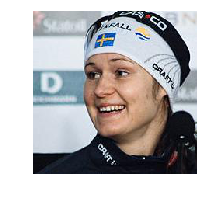

In [23]:
fname = path/test_path
img = open_image(fname)
img.show()

In [24]:
img.size

torch.Size([211, 211])

In [25]:
labels = pd.DataFrame(all_paths, columns=['fn_col'])

In [26]:
labels['label_col'] = age_array

In [27]:
labels.head()

,fn_col,label_col
0,17/10000217_1981-05-05_2009.jpg,28
1,48/10000548_1925-04-04_1964.jpg,39
2,12/100012_1948-07-03_2008.jpg,59
3,65/10001965_1930-05-23_1961.jpg,31
4,16/10002116_1971-05-31_2012.jpg,41


28

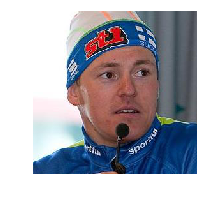

In [28]:
item_index = 0
img = open_image(path/labels['fn_col'][item_index])
img.show(); labels['label_col'][item_index]

In [29]:
labels['label_col']

0         28
1         39
2         59
3         31
4         41
5         51
6         33
7         77
8         60
9         29
10        41
11        36
12        23
13        28
14        38
15        25
16        32
17        36
18        19
19        77
20        51
21        42
22        30
23        33
24        28
25        33
26        29
27        59
28        13
29        27
        ... 
62298     32
62299     69
62300     39
62301    101
62302     27
62303     57
62304     24
62305     21
62306     44
62307     57
62308     44
62309     44
62310     30
62311     25
62312     78
62313     74
62314     22
62315     25
62316     30
62317     31
62318     23
62319     25
62320     21
62321     31
62322     24
62323     26
62324     22
62325     40
62326     29
62327     54
Name: label_col, Length: 62328, dtype: int64

In [30]:
labels.to_csv(path/'labels.csv', index=False, sep=',')

In [31]:
labels.describe()

,label_col
count,62328.000000
mean,36.559604
std,23.867147
min,-74.000000
25%,24.000000
50%,30.000000
75%,46.000000
max,1996.000000


In [32]:
path

PosixPath('data/ages/wiki_crop')

In [33]:
!ls

00_notebook_tutorial.ipynb	     lesson2-download-Copy1.ipynb
age_regression.ipynb		     lesson2-download.ipynb
city_streets_classification.ipynb    lesson2-sgd-Copy1.ipynb
data				     lesson2-sgd.ipynb
download_images-Copy1.ipynb	     lesson3-camvid.ipynb
ducklips_v_fishgape.ipynb	     lesson3-head-pose-Copy1.ipynb
images				     lesson3-head-pose.ipynb
lesson1-pets-Copy1.ipynb	     lesson3-imdb-Copy1.ipynb
lesson1-pets.ipynb		     lesson3-imdb.ipynb
lesson1-pets-play-with-labels.ipynb  lesson3-planet.ipynb


In [60]:
data = (ImageFileList.from_folder(path, extensions='.jpg')
#         .label_from_csv('labels.csv', folder=path, fn_col='fn_col', label_col='label_col')
#         .label_from_df(labels, fn_col='fn_col', label_col='label_col')
        .label_from_df(labels)
        .random_split_by_pct() 
       )

about to return labels!!
did random split!!


In [61]:
data

ImageSplitData; ImageLabelList (49863 items)
[[PosixPath('data/ages/wiki_crop/17/10000217_1981-05-05_2009.jpg') 28]
 [PosixPath('data/ages/wiki_crop/48/10000548_1925-04-04_1964.jpg') 39]
 [PosixPath('data/ages/wiki_crop/65/10001965_1930-05-23_1961.jpg') 31]
 [PosixPath('data/ages/wiki_crop/16/10002116_1971-05-31_2012.jpg') 41]
 ...
 [PosixPath('data/ages/wiki_crop/49/9996949_1937-04-17_1963.jpg') 26]
 [PosixPath('data/ages/wiki_crop/09/9998109_1972-12-27_2013.jpg') 40]
 [PosixPath('data/ages/wiki_crop/00/9999400_1981-12-13_2011.jpg') 29]
 [PosixPath('data/ages/wiki_crop/80/999980_1954-06-11_2008.jpg') 54]]
Path: .; ImageLabelList (12465 items)
[[PosixPath('data/ages/wiki_crop/12/100012_1948-07-03_2008.jpg') 59]
 [PosixPath('data/ages/wiki_crop/50/10006850_1973-08-17_2010.jpg') 36]
 [PosixPath('data/ages/wiki_crop/81/1000781_1930-07-07_2008.jpg') 77]
 [PosixPath('data/ages/wiki_crop/45/10013345_1956-05-26_1969.jpg') 13]
 ...
 [PosixPath('data/ages/wiki_crop/83/999383_1981-03-11_2005.jpg

In [65]:
data.datasets(ImageDatasetBase)

dataset_cls!! <class 'fastai.vision.data.ImageDatasetBase'>


TypeError: __init__() takes 1 positional argument but 3 were given

In [ ]:
        .datasets(ImageSplitDatasets)
        .transform(get_transforms(), size=128)
        .databunch().normalize(imagenet_stats)

In [52]:
data.train_ds[0]

TypeError: 'NoneType' object is not subscriptable

In [49]:
data.train_ds.y

In [71]:
data.classes

['label_col']

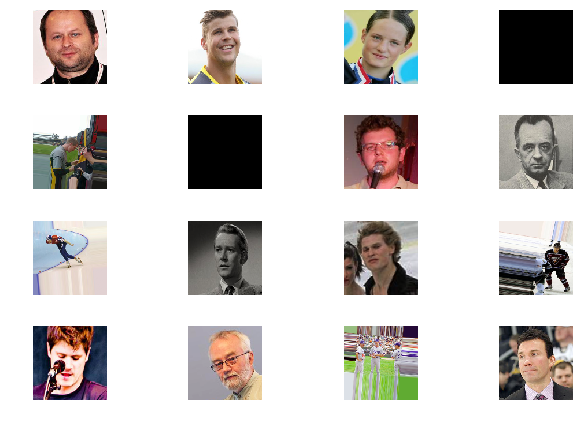

In [42]:
data.show_batch(4, figsize=(9,6))

In [37]:
learn = create_cnn(data, models.resnet34, metrics=exp_rmspe)
learn.loss_func = MSELossFlat()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


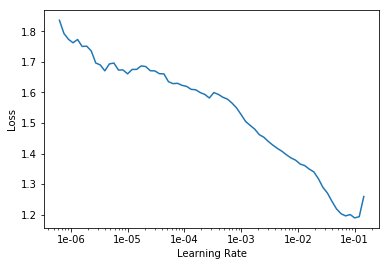

In [184]:
learn.lr_find()
learn.recorder.plot()

In [33]:
lr = 2e-2

In [38]:
learn.fit_one_cycle(5, slice(lr))

Total time: 07:28
epoch  train_loss  valid_loss  exp_rmspe
1      0.003205    0.001625    0.037204   (01:33)
2      0.000545    0.000407    0.011003   (01:28)
3      0.000793    0.000620    0.016701   (01:29)
4      0.000021    0.000324    0.002563   (01:29)
5      0.000391    0.014509    0.003427   (01:29)



In [39]:
learn.save('age-stage-1')

In [191]:
doc(Learner)

In [40]:
learn.get_preds()

[tensor([[0.0000],
         [0.0001],
         [0.0000],
         ...,
         [0.0007],
         [0.0003],
         [0.0001]]), tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]])]

In [41]:
learn.validate()

[0.014508679, tensor(0.0034)]

In [45]:
   def my_predict(learner, img:Image):
        ds = learner.data.valid_ds
        ds.set_item(img)
        res = learner.pred_batch()[0]
        ds.clear_item()
        return res

In [46]:
my_predict(learn, img)

tensor([0.0002])

In [47]:
learn.get_preds(with_loss=True)

[tensor([[0.0000],
         [0.0001],
         [0.0000],
         ...,
         [0.0007],
         [0.0003],
         [0.0001]]), tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]), tensor([1.8650e-09, 4.1774e-09, 2.5000e-09,  ..., 4.3660e-07, 1.2133e-07,
         1.2679e-08])]